## F0 Change Prediction Model


## Linear Regression 

In [7]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

   Unnamed: 0  year    Country      avg_f0  GenderEqualityScore
0           1  1965    Finland  218.940000             74.10888
1           3  1965     Sweden  217.724000             70.08254
2           4  1965   Thailand  230.265714             63.15021
3           6  1969  Australia  283.643333             62.68850
4           7  1969    Finland  230.770000             71.83257
Outlier found - Year: 2018, Country: South Africa, Gender Equality Score: 97.52986
Slope: [-0.05511127]
Intercept: 82.44805934520659


C:\Users\mjmj2\AppData\Local\Temp\ipykernel_17492\2155186092.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_filtered['PredictedScore'] = model.predict(X)


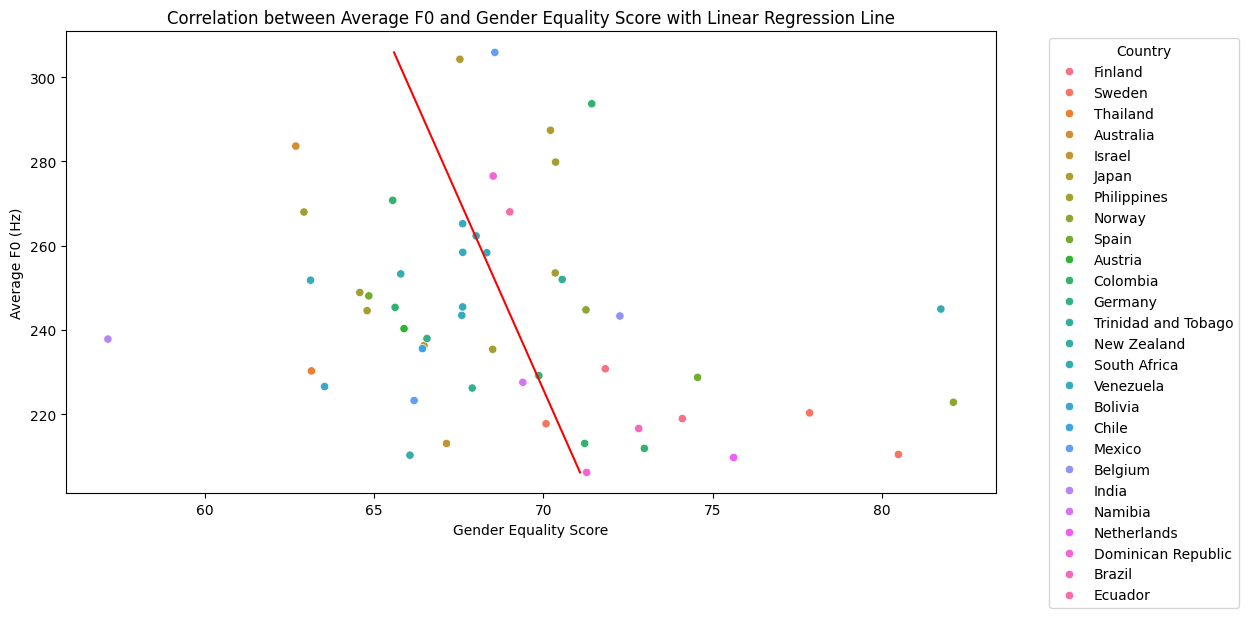

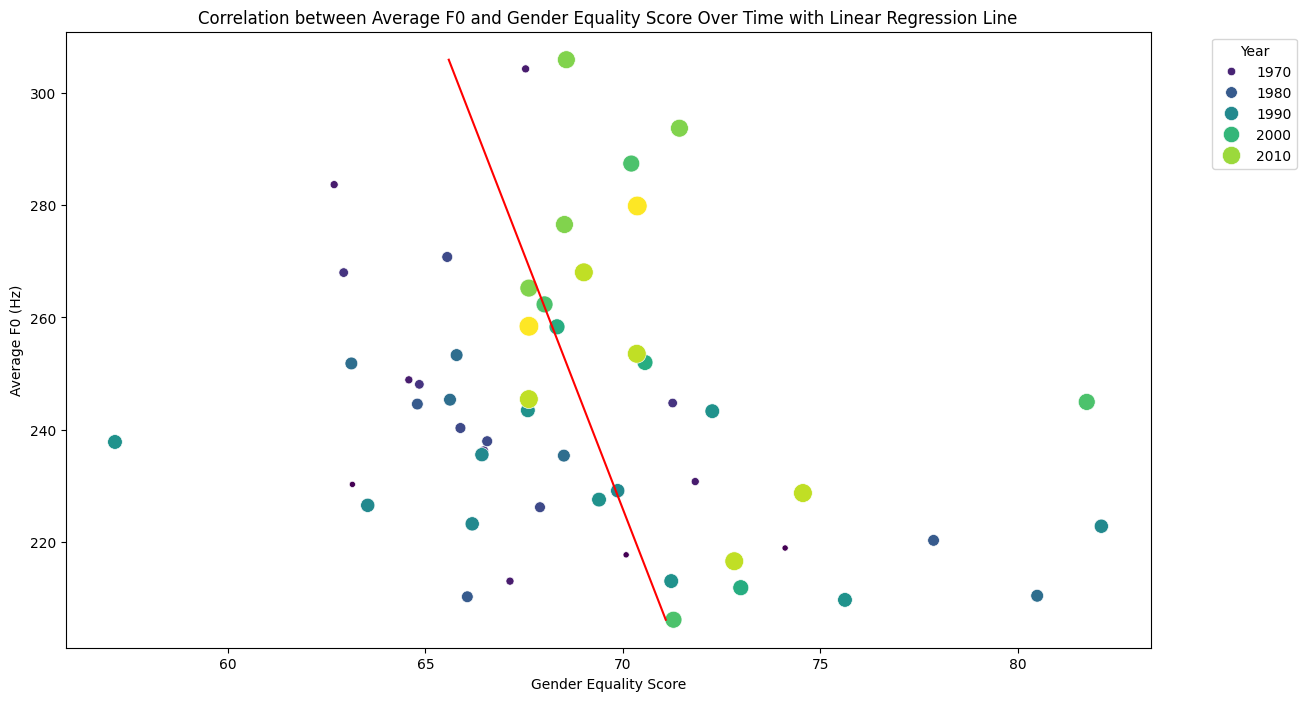

In [9]:
# Load the data files
f0_data_file = './F0_averaged copy.csv'
gender_equality_file = './combined_df1_1950_2021.csv'

# Reading the files
f0_data = pd.read_csv(f0_data_file)
gender_equality_data = pd.read_csv(gender_equality_file)

# Preprocessing the gender equality data
# Melting the dataframe to have 'Country' as a column
gender_equality_data_melted = gender_equality_data.melt(id_vars=['year'], var_name='Country', value_name='GenderEqualityScore')

# Renaming the column 'Year' to 'year' in F0 data to match the gender equality data
f0_data.rename(columns={'Year': 'year'}, inplace=True)

# Excluding specific countries
excluded_countries = ['Scotland', 'Puerto Rico', 'Serbia & Montenegro', 'Vietnam', 'Russia']
f0_data_filtered = f0_data[~f0_data['Country'].isin(excluded_countries)]
gender_equality_data_filtered = gender_equality_data_melted[~gender_equality_data_melted['Country'].isin(excluded_countries)]

# Merging the datasets on 'year' and 'Country'
merged_data = pd.merge(f0_data_filtered, gender_equality_data_filtered, how='inner', on=['year', 'Country'])
print(merged_data.head())

# Dropping NaN values
merged_data.dropna(subset=['GenderEqualityScore', 'avg_f0'], inplace=True)

# Finding and printing the outlier with Gender Equality Score over 95
outlier_data = merged_data[merged_data['GenderEqualityScore'] > 95]
for index, row in outlier_data.iterrows():
    print(f"Outlier found - Year: {row['year']}, Country: {row['Country']}, Gender Equality Score: {row['GenderEqualityScore']}")

# Excluding the outlier with Gender Equality Score over 95
merged_data_filtered = merged_data[merged_data['GenderEqualityScore'] <= 95]

# Selecting features for the regression model
X = merged_data_filtered[['avg_f0']]
y = merged_data_filtered['GenderEqualityScore']

# Linear regression
model = LinearRegression()
model.fit(X, y)

# Predictions for visualization
merged_data_filtered['PredictedScore'] = model.predict(X)

# Printing out the Slope and Intercept of the regression model
slope = model.coef_
intercept = model.intercept_
print("Slope:", slope)
print("Intercept:", intercept)

# Visualizing the results with a scatter plot and regression line
plt.figure(figsize=(12, 6))
sns.scatterplot(x='GenderEqualityScore', y='avg_f0', hue='Country', data=merged_data_filtered)
sns.lineplot(x='PredictedScore', y='avg_f0', color='red', data=merged_data_filtered)
plt.title('Correlation between Average F0 and Gender Equality Score with Linear Regression Line')
plt.xlabel('Gender Equality Score')
plt.ylabel('Average F0 (Hz)')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Using the year of the data as the color of the dots to represent time
plt.figure(figsize=(14, 8))
sns.scatterplot(x='GenderEqualityScore', y='avg_f0', hue='year', palette='viridis', size='year', sizes=(20, 200), data=merged_data_filtered)
sns.lineplot(x='PredictedScore', y='avg_f0', color='red', data=merged_data_filtered)
plt.title('Correlation between Average F0 and Gender Equality Score Over Time with Linear Regression Line')
plt.xlabel('Gender Equality Score')
plt.ylabel('Average F0 (Hz)')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



The scatter plot above visualizes the relationship between the Mean F0 (Hz) and the Gender Equality Score, with each dot representing a country/year data point. The red line represents the linear regression model fitted to these data points, illustrating the predicted relationship between the Mean F0 and the Gender Equality Score.

C:\Users\mjmj2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


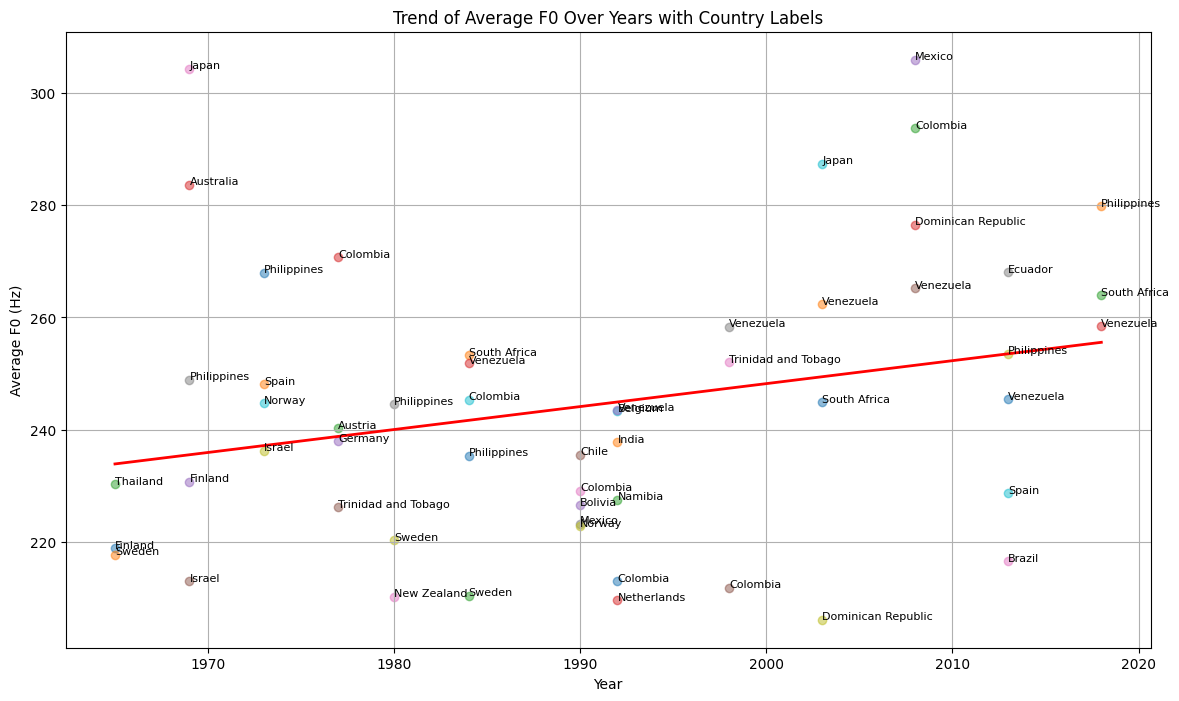

In [10]:
# Perform linear regression with avg_f0 as a function of year
model = LinearRegression()
X = merged_data[['year']]  # Predictor
y = merged_data['avg_f0']  # Response
model.fit(X, y)

# Make predictions over the range of years
X_predict = np.linspace(merged_data['year'].min(), merged_data['year'].max(), 100).reshape(-1, 1)
y_predict = model.predict(X_predict)

# Now we create a plot with year on the x-axis and avg_f0 on the y-axis with a trend line and country labels
plt.figure(figsize=(14, 8))
for i in range(merged_data.shape[0]):
    plt.scatter(merged_data['year'].iloc[i], merged_data['avg_f0'].iloc[i], alpha=0.5)
    plt.text(merged_data['year'].iloc[i], merged_data['avg_f0'].iloc[i], merged_data['Country'].iloc[i], fontsize=8)
plt.plot(X_predict, y_predict, color='red', linewidth=2)  # Add the trend line
plt.title('Trend of Average F0 Over Years with Country Labels')
plt.xlabel('Year')
plt.ylabel('Average F0 (Hz)')
plt.grid(True)
plt.show()


### Linear Regression based on Categorised GEI scores

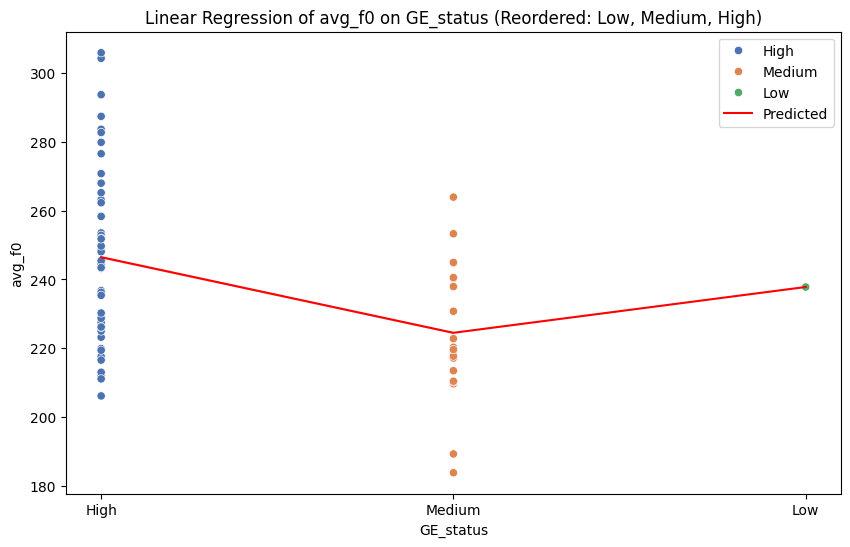

In [12]:
# Load the data from the uploaded file
file_path = './F0_averaged_GEstatusCategories.csv'
data = pd.read_csv(file_path)

# One-hot encoding for GE_status
data_with_dummies = pd.get_dummies(data, columns=['GE_status'])

# Selecting the relevant columns
X = data_with_dummies[['GE_status_High', 'GE_status_Low', 'GE_status_Medium']]
y = data_with_dummies['avg_f0']

# Fit the linear regression model
model_with_medium = LinearRegression().fit(X, y)

# Coefficients
intercept_with_medium = model_with_medium.intercept_
coefficients_with_medium = model_with_medium.coef_

# Preparing data for visualization
data_with_dummies['predicted_avg_f0'] = model_with_medium.predict(X)

# To improve the visualization, we'll create a new column 'GE_status_group' to facilitate plotting
data_with_dummies['GE_status_group'] = data_with_dummies.apply(
    lambda row: 'High' if row['GE_status_High'] == 1 else ('Low' if row['GE_status_Low'] == 1 else 'Medium'), axis=1
)

# Manually reordering the data for plotting
reordered_data = data_with_dummies.replace({'GE_status_group': {'High': 'Medium', 'Medium': 'High'}})

# Plotting with the manually reordered data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=reordered_data, x='GE_status_group', y='avg_f0', hue='GE_status_group', palette='deep')
sns.lineplot(data=reordered_data, x='GE_status_group', y='predicted_avg_f0', color='red', label='Predicted')
plt.title('Linear Regression of avg_f0 on GE_status (Reordered: Low, Medium, High)')
plt.xlabel('GE_status')
plt.ylabel('avg_f0')
plt.legend()
plt.show()

### GEI: High + Medium/Low

Intercept:  246.32342719780215
coefficient:  [-21.8139772]


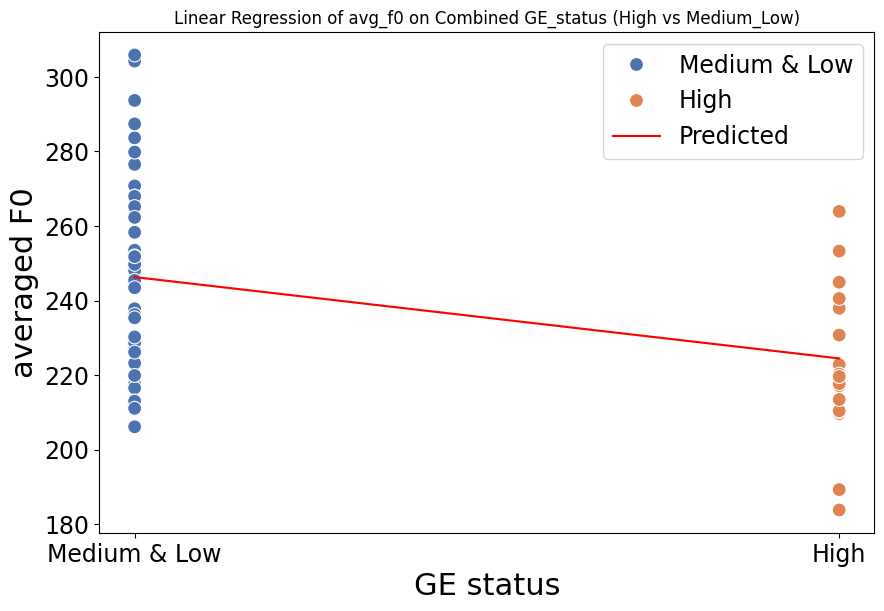

(246.32342719780215, array([-21.8139772]))

In [23]:
# Combining 'Medium' and 'Low' into one category 'Medium_Low'
data['GE_status_combined'] = data['GE_status'].replace({'Medium': 'Medium & Low', 'Low': 'Medium & Low'})

# Converting the binary categorical variable into a numerical form
data['GE_status_combined_num'] = data['GE_status_combined'].apply(lambda x: 1 if x == 'High' else 0)

# Preparing the variables for linear regression
X_combined = data[['GE_status_combined_num']]
y_combined = data['avg_f0']

# Fit the linear regression model
model_combined = LinearRegression().fit(X_combined, y_combined)

# Coefficients
intercept_combined = model_combined.intercept_
coefficients_combined = model_combined.coef_

print("Intercept: ", intercept_combined)
print("coefficient: ", coefficients_combined)

# Plotting
plt.figure(figsize=(10, 6.5))
sns.scatterplot(data=data, x='GE_status_combined', y='avg_f0', hue='GE_status_combined', palette='deep', s=100)
sns.lineplot(data=data, x='GE_status_combined', y=model_combined.predict(X_combined), color='red', label='Predicted')
plt.title('Linear Regression of avg_f0 on Combined GE_status (High vs Medium_Low)')
plt.xlabel('GE status', fontsize=22)
plt.ylabel('averaged F0', fontsize=22)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.legend(fontsize=17)
plt.show()

(intercept_combined, coefficients_combined)


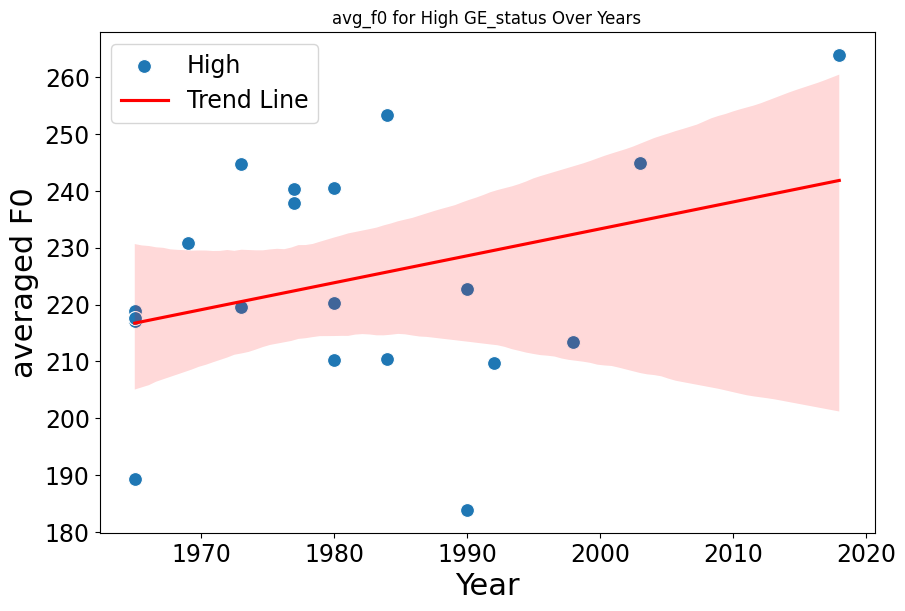

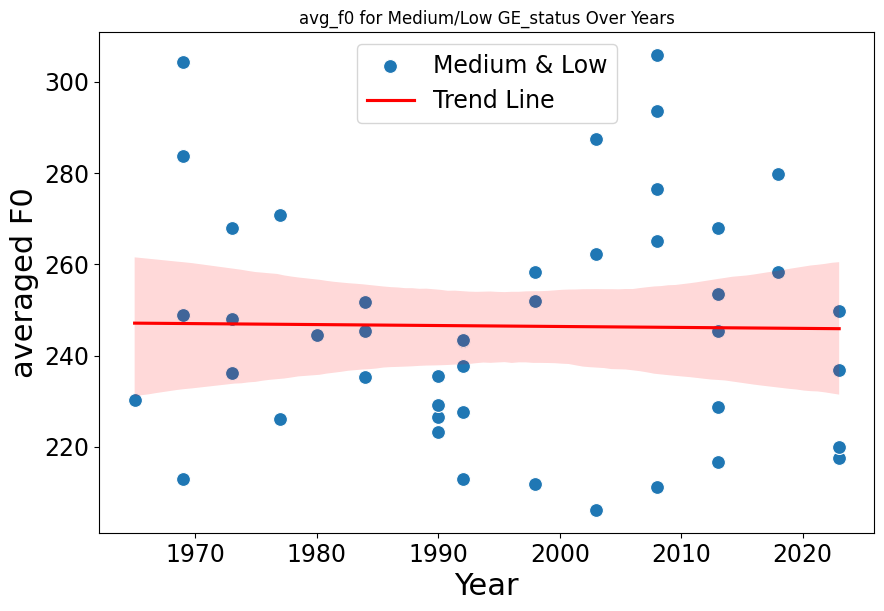

In [24]:
# Plotting the "High" category over "Year" due to a previous execution error
high_data = data[data['GE_status'] == 'High']
plt.figure(figsize=(10, 6.5))
sns.scatterplot(data=high_data, x='Year', y='avg_f0', label='High', s=100)
sns.regplot(data=high_data, x='Year', y='avg_f0', scatter=False, color='red', label='Trend Line')
plt.title('avg_f0 for High GE_status Over Years')
plt.xlabel('Year', fontsize=22)
plt.ylabel('averaged F0', fontsize=22)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.legend(fontsize=17)
plt.show()

medium_low_data = data[data['GE_status_combined'] == 'Medium & Low']
plt.figure(figsize=(10, 6.5))
sns.scatterplot(data=medium_low_data, x='Year', y='avg_f0', label='Medium & Low', s=100)
sns.regplot(data=medium_low_data, x='Year', y='avg_f0', scatter=False, color='red', label='Trend Line')
plt.title('avg_f0 for Medium/Low GE_status Over Years')
plt.xlabel('Year', fontsize=22)
plt.ylabel('averaged F0', fontsize=22)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.legend(fontsize=17)
plt.show()

## PCA 

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

Loadings on the 1st principal component:
Mean(Hz): 0.5823643642618603
StDev(Hz): 0.41519429549816395
Min(Hz): 0.06696688183567265
Med(Hz): 0.5583494462332792
Max(Hz): 0.4150021407798519


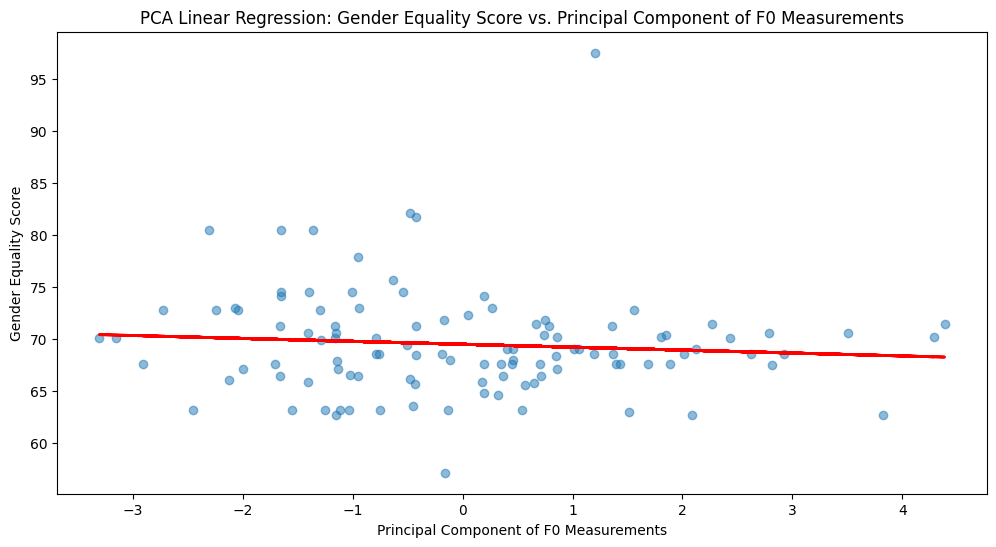

Slope: [-0.28064971]
Intercept: 69.49107761467889


In [7]:
# Standardize the F0 Measurements
scaler = StandardScaler()
f0_scaled = scaler.fit_transform(merged_data[['Mean(Hz)', 'StDev(Hz)', 'Min(Hz)', 'Med(Hz)', 'Max(Hz)']])

# Apply PCA
pca = PCA(n_components=1)  # Reduce to 1 principal component
f0_pca = pca.fit_transform(f0_scaled)

# Print the loadings for the 1st principal component
loadings = pca.components_.T
feature_names = ['Mean(Hz)', 'StDev(Hz)', 'Min(Hz)', 'Med(Hz)', 'Max(Hz)']
print("Loadings on the 1st principal component:")
for i, feature in enumerate(feature_names):
    print(f"{feature}: {loadings[i][0]}")
    
# Linear Regression with PCA Component
X_pca = f0_pca
y_pca = merged_data['GenderEqualityScore']
model_pca = LinearRegression()
model_pca.fit(X_pca, y_pca)

# Visualization
predicted_score_pca = model_pca.predict(X_pca)
plt.figure(figsize=(12, 6))
plt.scatter(X_pca[:, 0], y_pca, alpha=0.5)
plt.plot(X_pca[:, 0], predicted_score_pca, color='red', linewidth=2)
plt.title('PCA Linear Regression: Gender Equality Score vs. Principal Component of F0 Measurements')
plt.xlabel('Principal Component of F0 Measurements')
plt.ylabel('Gender Equality Score')
plt.show()

# Model Coefficients
pca_slope = model_pca.coef_
pca_intercept = model_pca.intercept_
print("Slope:", pca_slope)
print("Intercept:", pca_intercept)

### Loadinngs 
Loadings on the 1st principal component: <br>
Mean(Hz): 0.5823643642618603 <br>
StDev(Hz): 0.41519429549816395 <br>
Min(Hz): 0.06696688183567265 <br>
Med(Hz): 0.5583494462332792 <br>
Max(Hz): 0.4150021407798519 <br><br>

A high absolute value of the loading indicates that the corresponding feature has a strong influence on the component. This way, you can interpret which original variables contribute most to the principal component.

### Slope 

Slope: [-0.28064971] <br>
Intercept: 69.49107761467889 <br><br>

The slope (-0.28064971) indicates that for each unit increase in the principal component (a combination of all F0 measurements), the Gender Equality Score is predicted to decrease by approximately 0.281 points. This negative slope suggests a general trend where certain patterns in F0 characteristics are associated with lower Gender Equality Scores.

Overall, the model indicates a general inverse relationship between combined F0 characteristics and gender equality scores, as captured by the principal component.